## Predicting Customer Churn in Telecommunications Industry


## NoteBook Structure
i) Business Understanding<br>
ii) Data Understanding<br>
iii) Data Preparation<br>
iv) Modeling<br>
v) Evaluation<br>

## Business Understanding

In the telecommunications industry, customer churn poses a significant challenge for companies like SyriaTel. The objective is to develop a classifier that predicts whether a customer will soon terminate their services with SyriaTel. This binary classification task aims to uncover patterns in customer behavior and demographic data that may indicate a propensity to churn. The ultimate goal is to aid SyriaTel in reducing the financial impact of customer churn by implementing proactive retention strategies.

## Problem Statement

SyriaTel faces the challenge of retaining its customer base amidst a competitive telecommunications landscape. Customer churn not only leads to revenue loss but also affects the company's reputation and market position. The task at hand is to develop a predictive model that accurately identifies customers likely to churn, enabling SyriaTel to intervene with targeted retention initiatives.

## Objectives



To develop a classifier to predict customer churn for SyriaTel, aiming to reduce the financial impact of churn by implementing proactive retention strategies.


## Data Understanding

## Description of Data Source

The dataset was obtained from Kaggle and consists of 21 columns and 3333 rows. It contains information relevant to predicting customer churn for SyriaTel, a telecommunications company. Each row represents a customer, and each column represents a specific feature or attribute related to customer behavior, demographics, and interactions with SyriaTel's services.

## Dataset Relevance Summary

The Data has features encompassing demographics, usage patterns, interactions, and billing history, the dataset offers a rich source of information for building accurate predictive models. Its real-world context and sufficient size provide ample scope for exploration and analysis, empowering the project to develop effective retention strategies and mitigate customer churn.

## Data Preparation

In [247]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [248]:
# Load the dataset
df= pd.read_csv('Churn_dataset.csv')


In [249]:
# Cheking the first 10 rows
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [250]:
# Check the shape
df.shape

(3333, 21)

In [251]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [252]:
# Description of data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

In [253]:
# Checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [254]:
#check for duplicates
df.duplicated().sum()

0

In [255]:
# Convert 'churn' column to numeric (0 for False, 1 for True)
df['churn'] = df['churn'].astype(int)
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

The dataframe has no missing values and no duplicates

## Exploratory data analysis

### Churn Distribution

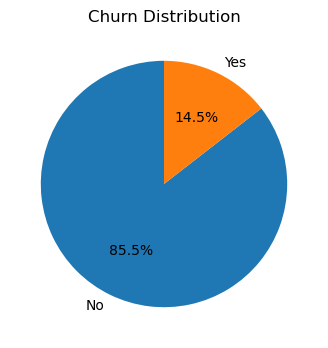

In [256]:
# Calculate churn counts
churn_counts = df['churn'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()


The pie chart indicates a higher percentage of customers staying compared to those churning. This suggests a positive state of customer retention. Businesses can use this insight to refine retention strategies and focus on areas for further reducing churn, ultimately enhancing customer satisfaction and long-term profitability.

### Churn Distribution by state

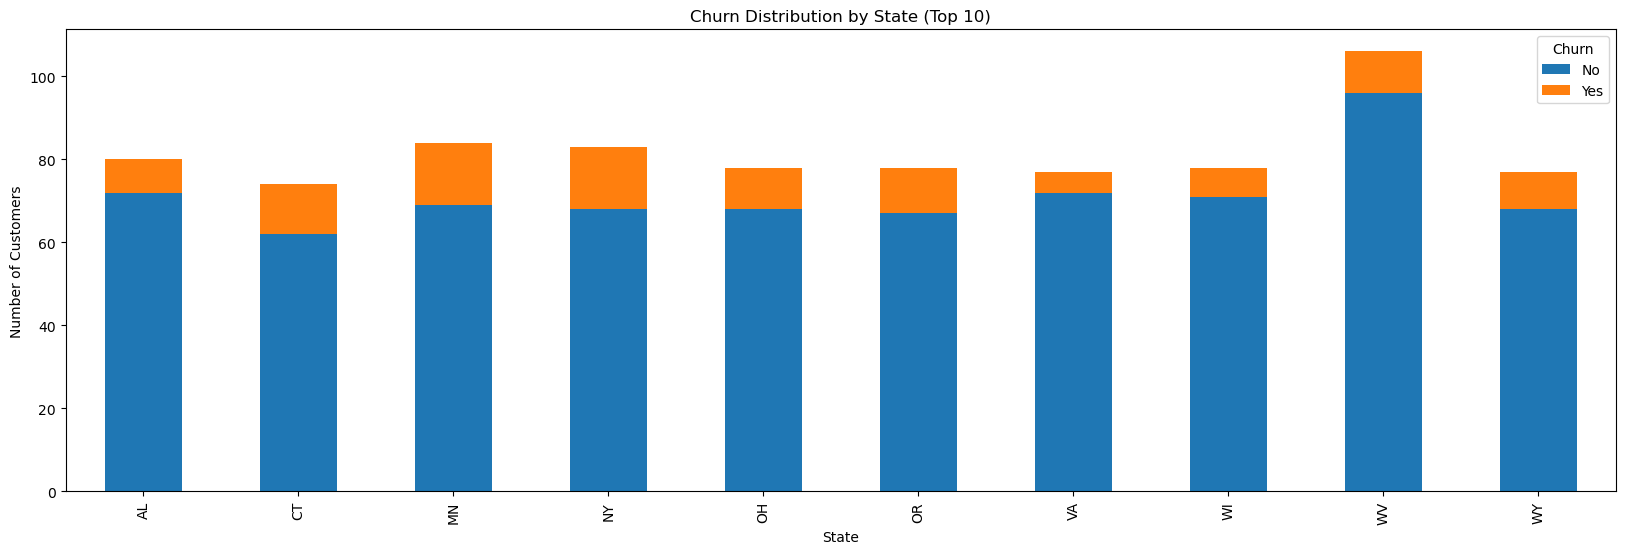

In [257]:
# Group the data by state and churn status, and count the number of customers
state_churn_counts = df.groupby(['state', 'churn']).size().unstack()

# Calculate churn percentage for each state
state_churn_counts['Total'] = state_churn_counts.sum(axis=1)
state_churn_counts.sort_values(by='Total', ascending=False, inplace=True)
top_states = state_churn_counts.head(10).index

# Plot churn distribution by state for the top 10 states
df[df['state'].isin(top_states)].groupby(['state', 'churn']).size().unstack().plot(kind='bar', figsize=(20, 6), stacked=True)

plt.title('Churn Distribution by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

 This reveals that West Virginia boasts the highest number of customers, with a notable proportion of them showing retention, as indicated by the low churn rate. 

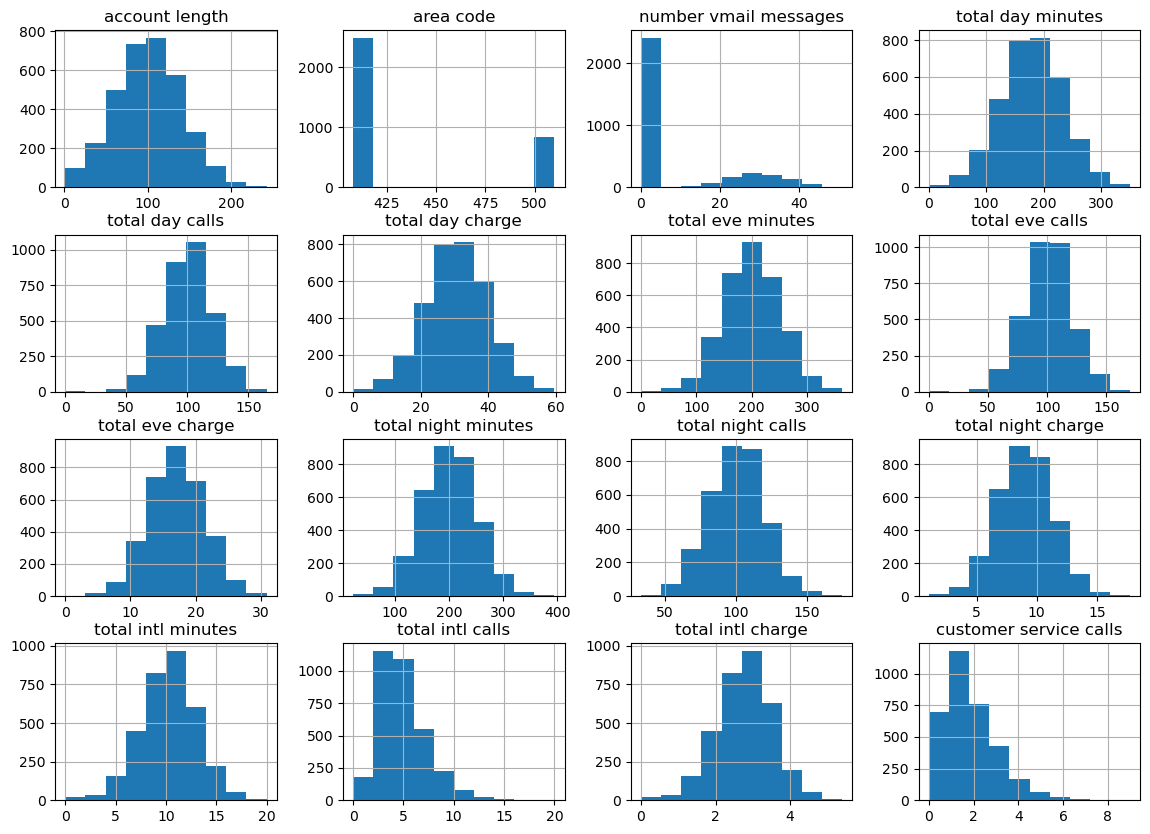

In [258]:
# Distribution of features excluding 'churn' column
df.drop(columns='churn').hist(figsize=(14,10))
plt.show()


The histograms illustrate disparities in feature scaling and non-normal distributions. To address this, scaling and normalization are needed. These steps ensure consistent feature ranges and distribution, enhancing analysis and modeling effectiveness.

In [259]:
# unique values of categorical features

categorical_cols = df.drop('phone number', axis=1).select_dtypes(include='object').columns
for col in categorical_cols:
    print(col)
    print(df[col].unique())


state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
international plan
['no' 'yes']
voice mail plan
['yes' 'no']


### Minutes Distributiion


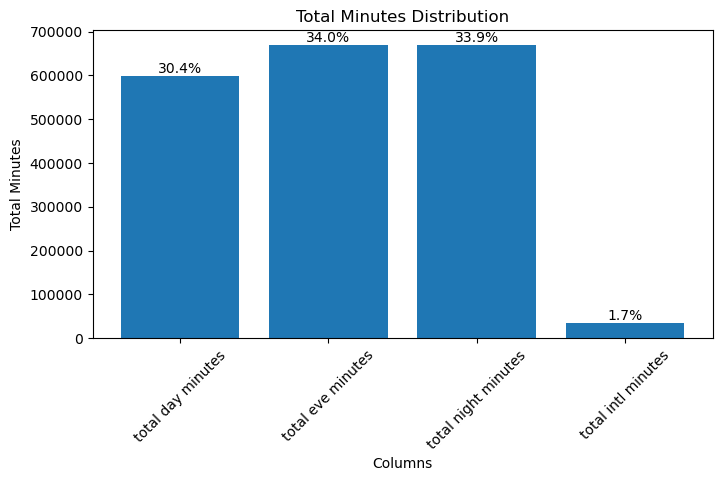

In [260]:
# Define the column names 
col_sum = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Calculate the sum for each column
sums = df[col_sum].sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(sums.index, sums)
plt.xlabel('Columns')
plt.ylabel('Total Minutes')
plt.title('Total Minutes Distribution')

# Add percentage labels 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10, f"{height/sum(sums)*100:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()


This histogram illustrates the distribution of total minutes across different call categories. Each bar represents the total sum of minutes for a specific call category, enabling visualization of the relative contribution of each call category to the overall total minutes. The observation from the histogram indicates that the total evening minutes have the highest sum compared to other call categories.

### Subscription plan distribution

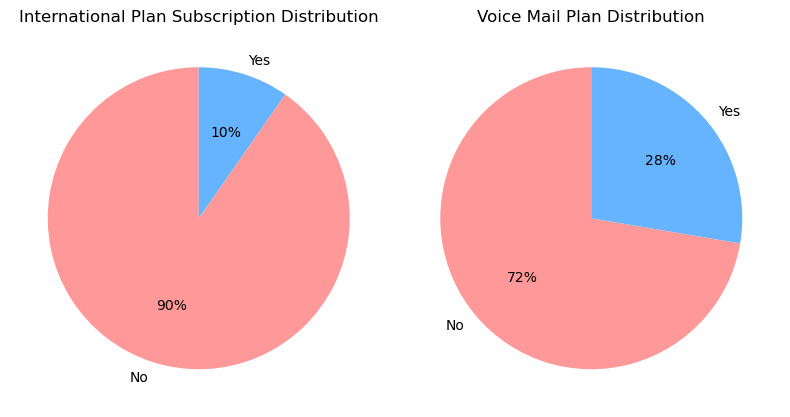

In [261]:
#  colors for the pie charts
colors = ['#ff9999', '#66b3ff']

# Create a figure with two subplots
plt.figure(figsize=(8, 5))

# Plot the first pie chart (International Plan Subscription Distribution)
plt.subplot(1, 2, 1)
plt.pie(df['international plan'].value_counts(), labels=['No', 'Yes'], autopct='%.0f%%', startangle=90, colors=colors)
plt.title('International Plan Subscription Distribution')

# Plot the second pie chart (Voice Mail Plan Distribution)
plt.subplot(1, 2, 2)
plt.pie(df['voice mail plan'].value_counts(), labels=['No', 'Yes'], autopct='%.0f%%', startangle=90, colors=colors)
plt.title('Voice Mail Plan Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Based on these observations, it can be inferred that there is a higher demand for voicemail services compared to international calling services among SyriaTel customers. This information can help the company tailor its marketing strategies and service offerings to better meet the needs and preferences of its customer base.

### Correlation of features

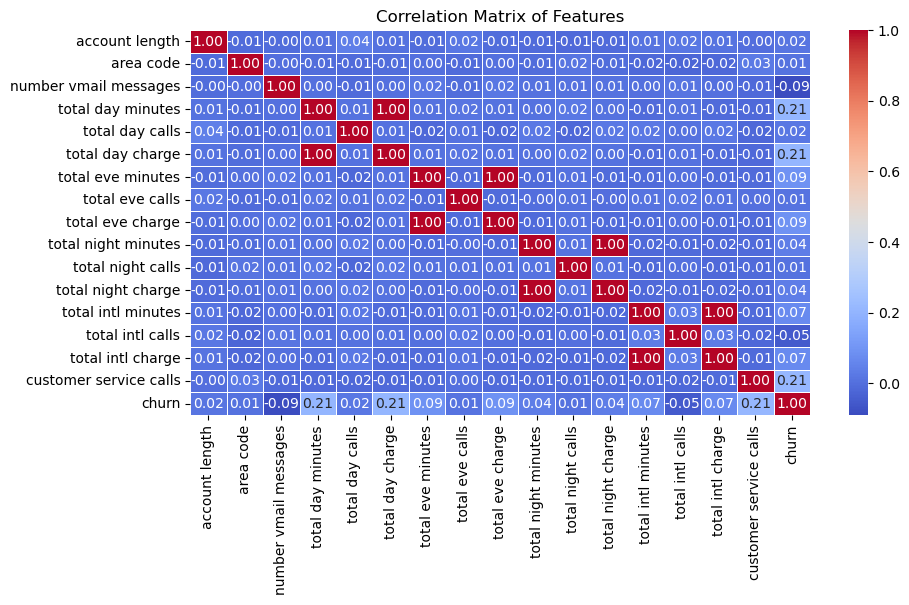

In [262]:
# Excluding non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Most features show very low correlation with each other.
Perfect positive correlations exist between total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes, which is expected as call charges depend on call duration.
Weak positive correlations are observed between total day minutes, total day charge, and customer service calls with churn.
Other features exhibit negligible correlations with churn, approximately 0.

In [263]:
# Remove non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Sort  values for 'churn' column in descending order
churn_corr = corr_matrix['churn'].sort_values(ascending=False)

# Display the sorted correlation values
churn_corr


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

### Scatter Plot of Total Day Minutes vs Total Intl Minutes

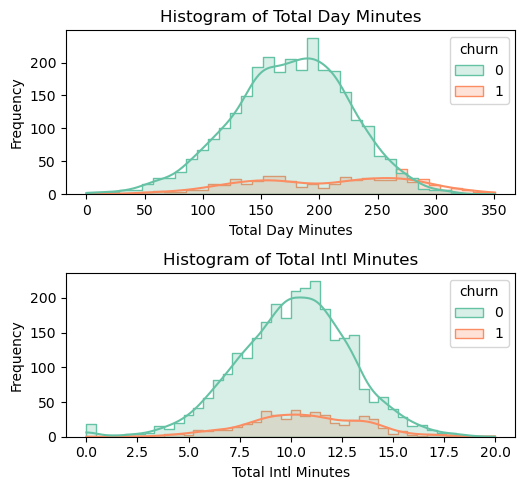

In [264]:
plt.figure(figsize=(10, 5))


# Histogram of Total Day Minutes
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='total day minutes', hue='churn', kde=True, palette='Set2', element='step', fill=True)
plt.title('Histogram of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')


# Histogram of Total Intl Minutes
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='total intl minutes', hue='churn', kde=True, palette='Set2', element='step', fill=True)
plt.title('Histogram of Total Intl Minutes')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


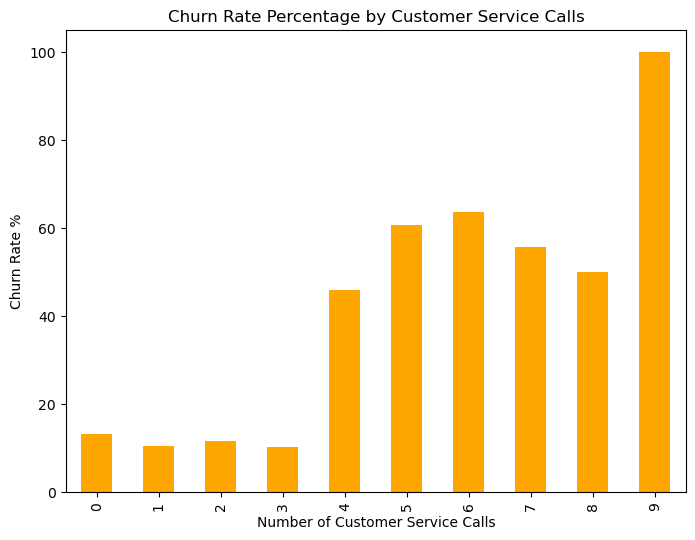

In [265]:
# Calculate churn rate percentage for each number of customer service calls
churn_rate = df.groupby('customer service calls')['churn'].mean() * 100

# Plotting a bar plot
churn_rate.plot(kind='bar', figsize=(8, 6), color='orange')

# Adding title and labels
plt.title('Churn Rate Percentage by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate %')

# Display the plot
plt.show()


A clear positive correlation emerges between the number of customer service calls and the likelihood of churn.

 There's a consistent rise in churn as the number of calls increases. 
 
 However, an increase in churn becomes evident after the 6th call, suggesting a potential turning point.

The sudden increase in churn after the 6th call suggests a crucial point where more interactions could make customers more unhappy, causing more people to leave.

While the overall trend indicates a higher likelihood of churn with more service calls, the sudden increase at the 6th call underscores its significance in influencing customer retention.



### Multicollinearity of features

In [266]:

# independent variables  to check multicollinearity
X = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,total day minutes,9.673057
1,total eve minutes,12.026619
2,total night minutes,12.000415
3,total intl minutes,10.844008


drop one of the columns with a high correlation (total day minutes and total day charge), (total eve minutes and total eve charge), (total night minutes and total night charge), (total intl minutes and total intl charge)

In [267]:
# drop the columns with high correlation
cols_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
df = df.drop(cols_drop, axis=1)
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [268]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                       int32
dtype: object

In [269]:
# Dummy variables
df = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first = True)

In [270]:
df.drop('phone number', axis=1, inplace=True)


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total intl minutes      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int32  
 13  state_AL                3333 non-null   bool   
 14  state_AR                3333 non-null   

### Data Modeling